# Restaurant Market Research & Analysis in Itaewon (Korea)

Background
Itaewon (Korea) is a place in Seoul that is popular for having restaurants that provides wide diversity of cuisines.
And because of this nature, main purpose of visitors to Itaewon for dining could be exposure to unique types of restaurants that are not readily available in other areas. Therefore, we would like to explore the restaurant market status in Itaewon and provide some insights for someone who would like to start a restaurant in Itaewon.

In this case, I would like to investigate if I can open a Hong Kong cuisine restaurant in Itaewon.


Methods
1. Extract restaurant data (distance from subway station, price rating, location, type of restaurant, popularity)

In [188]:
# Load Modules
import pandas as pd
import requests
import folium
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

In [2]:
# Foursquare API

CLIENT_ID = 'DW4MJBWXNUTJDVUJ35CH0JWLWWACBTCG5DFK5JHTHAFSCHOX' # your Foursquare ID
CLIENT_SECRET = 'K0WOQ40Q5II4JCJZ0JR3NV4QDY4013XHY5RUQODPQ2R1PDGQ' # your Foursquare Secret
VERSION = '20200321' # Foursquare API version
LIMIT = 50


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DW4MJBWXNUTJDVUJ35CH0JWLWWACBTCG5DFK5JHTHAFSCHOX
CLIENT_SECRET:K0WOQ40Q5II4JCJZ0JR3NV4QDY4013XHY5RUQODPQ2R1PDGQ


# 1. Process Restaurant Venues

In [3]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)

In [4]:
# make the GET request
results = requests.get(url).json()

In [5]:
food_categories = [i for i in results['response']['categories'] if i['name'] == 'Food'][0]

In [6]:
food_categories

{'id': '4d4b7105d754a06374d81259',
 'name': 'Food',
 'pluralName': 'Food',
 'shortName': 'Food',
 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
  'suffix': '.png'},
 'categories': [{'id': '503288ae91d4c4b30a586d67',
   'name': 'Afghan Restaurant',
   'pluralName': 'Afghan Restaurants',
   'shortName': 'Afghan',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/afghan_',
    'suffix': '.png'},
   'categories': []},
  {'id': '4bf58dd8d48988d1c8941735',
   'name': 'African Restaurant',
   'pluralName': 'African Restaurants',
   'shortName': 'African',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/african_',
    'suffix': '.png'},
   'categories': [{'id': '4bf58dd8d48988d10a941735',
     'name': 'Ethiopian Restaurant',
     'pluralName': 'Ethiopian Restaurants',
     'shortName': 'Ethiopian',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/ethiopian_',
      'suffix': '.png'},
     'categories': []}]},


In [7]:
food_categories_list = [i['name'] for i in food_categories['categories']]

In [8]:
food_categories_list

['Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bangladeshi Restaurant',
 'Belgian Restaurant',
 'Bistro',
 'Breakfast Spot',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Coffee Shop',
 'Comfort Food Restaurant',
 'Creperie',
 'Czech Restaurant',
 'Deli / Bodega',
 'Dessert Shop',
 'Diner',
 'Donut Shop',
 'Dumpling Restaurant',
 'Dutch Restaurant',
 'Eastern European Restaurant',
 'English Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Fish & Chips Shop',
 'Fondue Restaurant',
 'Food Court',
 'Food Stand',
 'Food Truck',
 'French Restaurant',
 'Fried Chicken Joint',
 'Friterie',
 'Gastropub',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Hot Dog Joint',
 'Hungar

# 2. Place of interest 's (Itaewon) Latitude and Longitude

In [73]:
NAME = 'Itaewon Station'
latitude = 37.5345
longitude = 126.9946
llAcc = 100
radius=750
LIMIT=200
SECTION='food'
PRICE_LOW=1 # TODO, How to get all the restaurants in Itaewon
PRICE_HIGH=2

In [108]:
# create the API request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&llAcc={}&radius={}&section={}&&sortByPopularity=1&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,
    llAcc,
    radius,
    SECTION,
    LIMIT)

# make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']

In [109]:
results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4eb500646da1df9ffa49a0ea',
   'name': 'Vatos Urban Tacos (바토스)',
   'location': {'address': '용산구 이태원로15길 1',
    'crossStreet': '본점',
    'lat': 37.534323925979514,
    'lng': 126.99028344714056,
    'labeledLatLngs': [{'label': 'display',
      'lat': 37.534323925979514,
      'lng': 126.99028344714056}],
    'distance': 381,
    'postalCode': '04351',
    'cc': 'KR',
    'city': '서울특별시',
    'state': '서울특별시',
    'country': '대한민국',
    'formattedAddress': ['용산구 이태원로15길 1 (본점)',
     '이태원1동',
     '서울특별시',
     '서울특별시',
     '04351',
     '대한민국']},
   'categories': [{'id': '4bf58dd8d48988d1c1941735',
     'name': 'Mexican Restaurant',
     'pluralName': 'Mexican Restaurants',
     'shortName': 'Mexican',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mexican_',
      'suffix': '.png'},
     'primary

In [111]:
venues_list=[]
venues_list.append([(
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['location']['distance']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = [
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category',
              'Distance']

In [116]:
nearby_venues.shape[0]

100

In [117]:
nearby_venues['Popularity'] = list(range(nearby_venues.shape[0], 0, -1))

In [119]:
popularity = nearby_venues[['Venue', 'Popularity']]

In [120]:
popularity

,Venue,Popularity
0,Vatos Urban Tacos (바토스),100
1,Anthracite Coffee Roasters (앤트러사이트),99
2,McDonald's (맥도날드),98
3,Petra (페트라),97
4,Maple Tree House (단풍나무집),96
5,The Halal Guys,95
6,Mr. Kebab Itaewon Halal Food (미스터케밥),94
7,Ankara Picnic (앙카라피크닉),93
8,명동교자,92
9,The Original Pancake House Itaewon (The Origin...,91


In [113]:
no_cafe = nearby_venues[nearby_venues['Venue Category'] != 'Café']

In [88]:
def get_nearby_venues(names, latitudes, longitudes, price, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&section={}&price={},{}&sortByPopularity=1&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            SECTION,
            price,
            price,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['location']['distance'],
            price) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Distance',
                    'Price']
    
    return(nearby_venues)

In [133]:
itaewon_venues_price_1 = get_nearby_venues(['Itaewon'], [latitude], [longitude], 1, 750)
itaewon_venues_price_1.shape

Itaewon


(45, 9)

In [134]:
itaewon_venues_price_2 = get_nearby_venues(['Itaewon'], [latitude], [longitude], 2, 750)
itaewon_venues_price_2.shape

Itaewon


(60, 9)

In [135]:
itaewon_venues_price_3 = get_nearby_venues(['Itaewon'], [latitude], [longitude], 3, 750)
itaewon_venues_price_3.shape

Itaewon


(8, 9)

In [136]:
itaewon_venues_price_4 = get_nearby_venues(['Itaewon'], [latitude], [longitude], 4, 750)
itaewon_venues_price_4.shape

Itaewon


(4, 9)

In [97]:
itaewon_venues = pd.concat([itaewon_venues_price_1, itaewon_venues_price_2, itaewon_venues_price_3, itaewon_venues_price_4])

In [137]:
itaewon_venues.shape

(117, 9)

In [138]:
# Combine popularity ratings
itaewon_venues_popularity = pd.merge(itaewon_venues, popularity, on='Venue')

In [139]:
itaewon_venues_popularity

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Distance,Price,Popularity
0,Itaewon,37.5345,126.9946,Anthracite Coffee Roasters (앤트러사이트),37.536233,127.000026,Café,516,1,99
1,Itaewon,37.5345,126.9946,McDonald's (맥도날드),37.534176,126.989690,Fast Food Restaurant,434,1,98
2,Itaewon,37.5345,126.9946,Ankara Picnic (앙카라피크닉),37.534563,126.994308,Turkish Restaurant,26,1,93
3,Itaewon,37.5345,126.9946,명동교자,37.530839,126.990893,Dumpling Restaurant,522,1,92
4,Itaewon,37.5345,126.9946,The Original Pancake House Itaewon (The Origin...,37.534348,126.991036,Breakfast Spot,315,1,91
5,Itaewon,37.5345,126.9946,Champ Coffee (챔프커피),37.532608,126.992794,Café,264,1,86
6,Itaewon,37.5345,126.9946,Motor City (모터시티),37.534043,126.989408,Pizza Place,461,1,80
7,Itaewon,37.5345,126.9946,K.2.1.2,37.531460,126.991811,Café,418,1,77
8,Itaewon,37.5345,126.9946,ANDO (안도),37.534831,126.998167,Café,317,1,74
9,Itaewon,37.5345,126.9946,El Pino 323 (엘피노323),37.537222,126.986914,Mexican Restaurant,743,1,73


# 3. Finding Market Niche
By investigating the saturation level of different types of existing restaurants, we would be able to find some market niche.

## Common Types of Restaurants

In [140]:
counts = itaewon_venues_popularity['Venue Category'].value_counts().to_frame()

In [141]:
counts = counts.reset_index()

In [142]:
counts = counts.rename(columns={'index': 'Restaurant Type', 'Venue Category': 'Count'})

In [143]:
counts

,Restaurant Type,Count
0,Café,13
1,Korean Restaurant,8
2,Pizza Place,6
3,BBQ Joint,6
4,Burger Joint,5
5,Italian Restaurant,5
6,Vietnamese Restaurant,5
7,French Restaurant,4
8,Dumpling Restaurant,3
9,Salad Place,3


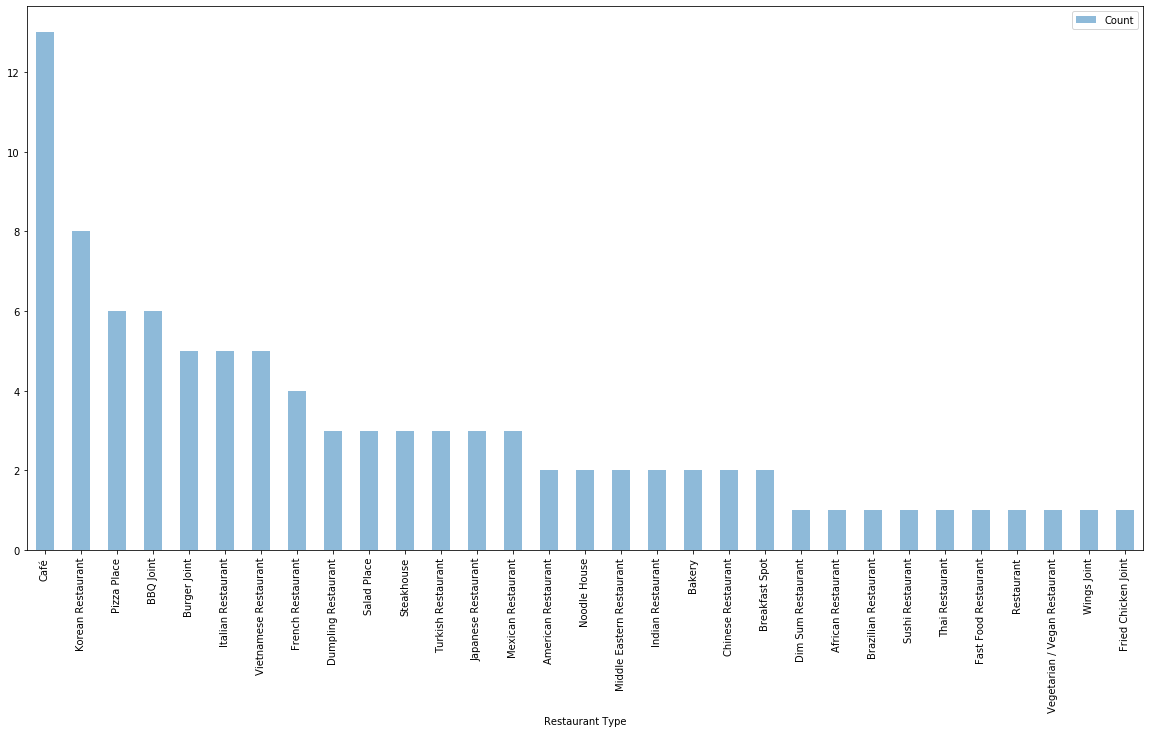

In [144]:
counts.plot(kind='bar', x='Restaurant Type', y='Count', figsize=(20,10), alpha=0.5)

In [145]:
print("Top 10 Common Restaurants Are")
for idx,row in counts.head(10).iterrows():
    print(row["Restaurant Type"], row["Count"])

Top 10 Common Restaurants Are
Café 13
Korean Restaurant 8
Pizza Place 6
BBQ Joint 6
Burger Joint 5
Italian Restaurant 5
Vietnamese Restaurant 5
French Restaurant 4
Dumpling Restaurant 3
Salad Place 3


## Popularity Comparison between Types of Restaurants

In [148]:
popularity_by_types = itaewon_venues_popularity.groupby("Venue Category")['Popularity'].mean().to_frame()

In [151]:
popularity_by_types

,Popularity
Venue Category,
African Restaurant,61.000000
American Restaurant,54.500000
BBQ Joint,57.500000
Bakery,53.500000
Brazilian Restaurant,24.000000
Breakfast Spot,80.000000
Burger Joint,33.200000
Café,49.615385
Chinese Restaurant,3.000000


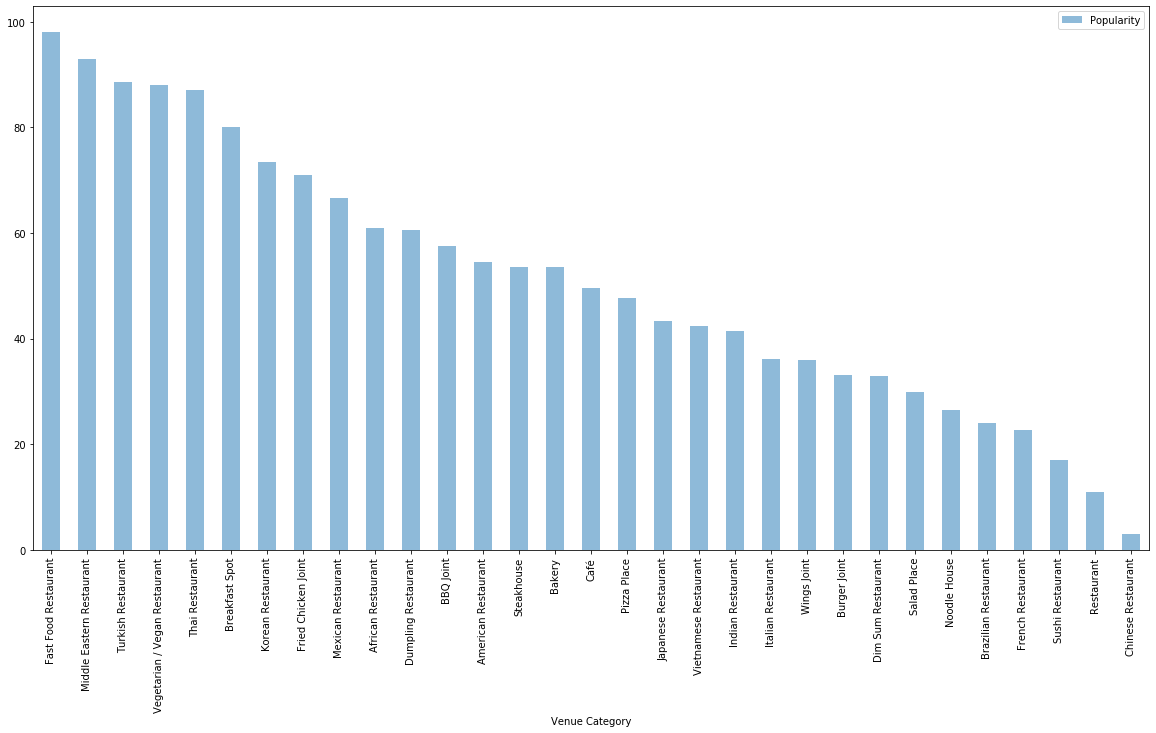

In [154]:
popularity_by_types.sort_values('Popularity', ascending=False).plot(kind="bar",  figsize=(20,10), alpha=0.5)

Some questions:
    1. Is it popular because it is nearby the stations (many people use subway for transportation since traffic is inconvenient in crowded places)
    2. It is popular because it is cheap?

## Correlation between distance and popularity

In [155]:
corr_dist_pop = itaewon_venues_popularity[['Distance', 'Popularity']].corr()

In [156]:
corr_dist_pop

,Distance,Popularity
Distance,1.000000,-0.068635
Popularity,-0.068635,1.000000


## Correlation between price and popularity

In [157]:
corr_price_pop = itaewon_venues_popularity[['Price', 'Popularity']].corr()

In [158]:
corr_price_pop

,Price,Popularity
Price,1.000000,0.096055
Popularity,0.096055,1.000000


## Correlation between restaurant type saturation and popularity

In [171]:
saturation = itaewon_venues_popularity.groupby("Venue Category").size().reset_index(name='Count')

In [172]:
saturation = saturation.set_index("Venue Category")

In [173]:
popularity_by_types = itaewon_venues_popularity.groupby("Venue Category")['Popularity'].mean().to_frame()

In [174]:
sat_pop = pd.concat([saturation, popularity_by_types], axis=1)

In [175]:
sat_pop

,Count,Popularity
Venue Category,,
African Restaurant,1,61.000000
American Restaurant,2,54.500000
BBQ Joint,6,57.500000
Bakery,2,53.500000
Brazilian Restaurant,1,24.000000
Breakfast Spot,2,80.000000
Burger Joint,5,33.200000
Café,13,49.615385
Chinese Restaurant,2,3.000000


In [176]:
corr_sat_pop = sat_pop[['Count', 'Popularity']].corr()

In [177]:
corr_sat_pop

,Count,Popularity
Count,1.000000,-0.015281
Popularity,-0.015281,1.000000


Popularity "Ranking" does not give exact measurement for popularity in terms of absolute popularity. Hence the results might not be accurate. So I have decided to neglect the use of the popularity ranking in this case and use visualization approcach.

# 4. Find suitable place for Hong Kong Cuisine Restaurant

In [181]:
categories = list(itaewon_venues_popularity['Venue Category'].unique())

In [189]:
colors_array = cm.rainbow(np.linspace(0, 1, len(categories)))
rainbow = {cat:colors.rgb2hex(i) for (cat, i) in zip(categories, colors_array)}

In [190]:
rainbow

{'Café': '#8000ff',
 'Fast Food Restaurant': '#7019ff',
 'Turkish Restaurant': '#5e35fe',
 'Dumpling Restaurant': '#4e4dfc',
 'Breakfast Spot': '#3c68f9',
 'Pizza Place': '#2c7ef7',
 'Mexican Restaurant': '#1996f3',
 'Fried Chicken Joint': '#09a9ee',
 'Bakery': '#08bee9',
 'Burger Joint': '#18cde4',
 'Salad Place': '#2adddd',
 'Noodle House': '#3ae8d6',
 'Wings Joint': '#4df3ce',
 'Chinese Restaurant': '#5df9c7',
 'Middle Eastern Restaurant': '#6efebe',
 'Korean Restaurant': '#80ffb4',
 'Vegetarian / Vegan Restaurant': '#90feab',
 'Thai Restaurant': '#a2f9a0',
 'Italian Restaurant': '#b2f396',
 'Vietnamese Restaurant': '#c4e88a',
 'American Restaurant': '#d4dd80',
 'BBQ Joint': '#e6cd73',
 'Indian Restaurant': '#f6be68',
 'African Restaurant': '#ffa95b',
 'Japanese Restaurant': '#ff964f',
 'Dim Sum Restaurant': '#ff7e41',
 'Brazilian Restaurant': '#ff6835',
 'Sushi Restaurant': '#ff4d27',
 'French Restaurant': '#ff351b',
 'Restaurant': '#ff190d',
 'Steakhouse': '#ff0000'}

In [192]:
#5df9c7

In [191]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=16)



# add markers to the map
markers_colors = []
for lat, lon, poi in zip(itaewon_venues_popularity['Venue Latitude'], itaewon_venues_popularity['Venue Longitude'], itaewon_venues_popularity['Venue Category']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[poi],
        fill_color=rainbow[poi],
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 5. Find suitable price range for Hong Kong Cuisine Restaurant

In [193]:
hk_restaurants_related = ['Dumpling Restaurant', 'Chinese Restaurant', 'Dim Sum Restaurant']

In [195]:
hk = itaewon_venues_popularity.loc[itaewon_venues_popularity['Venue Category'].isin(hk_restaurants_related)]

In [196]:
hk

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Distance,Price,Popularity
3,Itaewon,37.5345,126.9946,명동교자,37.530839,126.990893,Dumpling Restaurant,522,1,92
18,Itaewon,37.5345,126.9946,YE Shanghai (야상해),37.534776,126.992832,Dumpling Restaurant,159,1,46
39,Itaewon,37.5345,126.9946,넘버원양꼬치,37.530440,126.996766,Chinese Restaurant,490,1,4
40,Itaewon,37.5345,126.9946,대한각,37.530881,126.991404,Chinese Restaurant,491,1,2
69,Itaewon,37.5345,126.9946,Jonny Dumpling (쟈니덤플링),37.535021,126.994744,Dumpling Restaurant,59,2,44
72,Itaewon,37.5345,126.9946,Bao Bar (바오바),37.534572,126.988032,Dim Sum Restaurant,579,2,33
